# Project: Wrangle and Analyse Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li>
    <a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#gathering">Gathering</a>
        <li><a href="#assessing">Assessing</a>
        <li><a href="#cleaning">Cleaning</a>
    </ul>
</li>
<li><a href="#visualisation">Analysis Visualisation</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be wrangling, analyzing and visualizing the tweet archive of Twitter user <a href='https://twitter.com/dog_rates'>@dog_rates</a>, also known as <a href='https://en.wikipedia.org/wiki/WeRateDogs'>WeRateDogs</a>. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog

In [2]:
# imports 
import pandas as pd
import numpy as np 
import requests
import io
import json
import tweepy
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will gather the data, check for cleanliness, and then Assess and Clean the data for analysis.

<a id="gathering"></a>
### Data Gathering
> We will be gathering 3 pieces of data using different methods.
#### 1. The WeRateDogs Twitter archive

In [93]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Image Predictions

In [94]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)
data = resp.content.decode('utf8')
image_predictions = pd.read_csv(io.StringIO(data), sep='\t')
# save the file for future use
image_predictions.to_csv('image-predictions.tsv', sep='\t')

#### 3. WeRateDogs Twitter API Data

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
with open("tweet_json.txt", "w") as outfile:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        except Exception as e:
            print(str(tweet_id) + str(e))

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778[{'code': 144, 'message': 'No status found wit

In [95]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

<a id="assessing"></a>
### Data Assessing

In [96]:
tweet_api_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37001,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7895,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31849,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5865,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23988,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3870,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40333,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8062,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38544,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,8729,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19375,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,2903,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11299,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,1919,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",62433,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,17626,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26664,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,4001,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30525,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,6864,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [97]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [98]:
tweet_api_data.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2333.000000,2.333000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2333.000000
mean,7719.504501,7.419279e+17,7.440692e+17,2.040329e+16,8.113972e+17,2780.791685
std,11983.183133,6.820607e+16,7.524295e+16,1.260797e+17,6.295843e+16,4706.781099
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1339.000000,6.782786e+17,6.757073e+17,3.589728e+08,7.761338e+17,559.000000
50%,3360.000000,7.184547e+17,7.032559e+17,4.196984e+09,8.281173e+17,1298.000000
75%,9476.000000,7.986654e+17,8.233264e+17,4.196984e+09,8.637581e+17,3233.000000
max,159902.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79891.000000


In [99]:
tweet_api_data.id.duplicated().sum()

0

In [100]:
# compare id and id_str columns
ids = tweet_api_data.id
str_ids = tweet_api_data.id_str
count = []
for i in range(len(ids)):
    count.append(ids[i] == int(str_ids[i]))
sum(count)

2333

In [101]:
tweet_api_data.favorited.sum()

0

In [102]:
tweet_api_data.retweeted.sum()

0

In [103]:
tweet_api_data.truncated.sum()

0

In [104]:
tweet_api_data.user

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
5       {'id': 4196983835, 'id_str': '4196983835', 'na...
6       {'id': 4196983835, 'id_str': '4196983835', 'na...
7       {'id': 4196983835, 'id_str': '4196983835', 'na...
8       {'id': 4196983835, 'id_str': '4196983835', 'na...
9       {'id': 4196983835, 'id_str': '4196983835', 'na...
10      {'id': 4196983835, 'id_str': '4196983835', 'na...
11      {'id': 4196983835, 'id_str': '4196983835', 'na...
12      {'id': 4196983835, 'id_str': '4196983835', 'na...
13      {'id': 4196983835, 'id_str': '4196983835', 'na...
14      {'id': 4196983835, 'id_str': '4196983835', 'na...
15      {'id': 4196983835, 'id_str': '4196983835', 'na...
16      {'id': 4196983835, 'id_str': '4196983835', 'na...
17      {'id':

In [105]:
tweet_api_data.is_quote_status.sum()

31

In [106]:
tweet_api_data.lang.value_counts()

en     2315
und       7
nl        3
in        3
es        1
eu        1
tl        1
et        1
ro        1
Name: lang, dtype: int64

In [107]:
tweet_api_data.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [108]:
tweet_api_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2199
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [109]:
tweet_api_data.created_at.duplicated().sum()

0

In [110]:
type(tweet_api_data.created_at[0])

str

In [111]:
tweet_api_data.possibly_sensitive.sum()

0

In [112]:
tweet_api_data.possibly_sensitive_appealable.sum()

0

In [113]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [114]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [116]:
image_predictions.tweet_id.duplicated().sum()

0

In [117]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [118]:
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [119]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [120]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [121]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [122]:
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [123]:
for i in twitter_archive.query('rating_numerator < 10')[['text', 'rating_numerator']].values:
    print(i)

[ 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'
 5]
[ "This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1"
 6]
[ "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"
 0]
["I was going to do 007/10, but the joke wasn't worth the &lt;10 rating" 7]
[ "RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…"
 7]
[ "RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…"
 9]
[ 'RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…'
 8]
[ "RT @dog_rates: Not familiar with

In [124]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Buddy         7
Toby          7
Daisy         7
an            7
Rusty         6
Stanley       6
Scout         6
Jax           6
Koda          6
Milo          6
Jack          6
Bella         6
Oscar         6
Leo           6
Dave          6
very          5
           ... 
Dudley        1
Tebow         1
Bobb          1
Burt          1
Richie        1
Tess          1
Sweet         1
Dallas        1
Ace           1
Emanuel       1
Thor          1
Monkey        1
Winifred      1
Grizz         1
Crawford      1
Jonah         1
Baron         1
Kellogg       1
Fwed          1
Theo          1
Chase         1
Lilah         1
Torque        1
Pluto         1
Evy           1
Skye          1
Duchess       1
Sandra        1
Fido          1
Alf           1
Name: name, Length: 957,

In [125]:
image_predictions.query('tweet_id == 677716515794329600')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
560,677716515794329600,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True


In [126]:
type(twitter_archive.timestamp[0])

str

#### Quality
##### tweet_api_data
- contributors, coordinates, geo, and place columns contain only null values.
- favorited, retweeted and truncated columns contain only False values because it depends on the user who gathers the data.
- user column contains unrelated data (information about the user who gather the data from the API) and all the rows are the same.
- source column: the URL is inside an HTML tag.
- created_at data type is a string instead of DateTime.
- possibly_sensitive and possibly_sensitive_appealable columns contain only False values.


##### image_predictions
- p1, p2, p3 columns: whitespace are not standardized sometimes they use '-' other times '_' and some words are Capitalized others not.

##### twitter_archive
- data type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns is float it should be int.
- some names are not real dog names like 'a', 'the', 'an'... (I think that happens because the tweets are not dog rating).
- name, doggo, floofer, puppo, and pupper columns contain None string instead of a null value.
- The timestamp column data type is a string.
- rating_denominator contains some values different than 10.
- rating_numerator contains some values less than 10.

#### Tidiness
- extended_entities column contains data that exists in entities column.
- id and id_str contain the same data (the same data in different data types).
- tweet_api_data and twitter_archive contain duplicated data: created_at, source, text, in_reply_to_status_id, in_reply_to_user_id.
- tweet_api_data, image_predictions, and twitter_archive should be at the same table.

<a id="cleaning"></a>
### Data Cleaning

In [169]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

#### Tidiness
##### Define
>Drop all the duplicated id columns (id_str, in_reply_to_status_id_str, in_reply_to_user_id_str).
##### Code

In [170]:
tweet_api_data_clean.drop(columns=['id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str'], inplace=True)

##### Test

In [171]:
tweet_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 29 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_user_id              77 non-null float64
is_quote_status                  2333 non-null bool
lang                             2333 non-null object
place                            1 non-null obje

##### Define
>Drop extended_entities column.
##### Code

In [172]:
tweet_api_data_clean.drop(columns = ['extended_entities'], inplace = True)

##### Test

In [173]:
tweet_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 28 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2333 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null object
id                               2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_user_id              77 non-null float64
is_quote_status                  2333 non-null bool
lang                             2333 non-null object
place                            1 non-null object
possibly_sensitive               2199 non-null obje

##### Define
>Drop dublicated columns between **tweet_api_data** and **twitter_archive** (created_at, source, text, in_reply_to_status_id, in_reply_to_user_id.)
##### Code

In [174]:
tweet_api_data_clean.drop(columns=['created_at', 'source', 'full_text', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

##### Test

In [175]:
tweet_api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 23 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
display_text_range               2333 non-null object
entities                         2333 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
geo                              0 non-null object
id                               2333 non-null int64
in_reply_to_screen_name          77 non-null object
is_quote_status                  2333 non-null bool
lang                             2333 non-null object
place                            1 non-null object
possibly_sensitive               2199 non-null object
possibly_sensitive_appealable    2199 non-null object
quoted_status                    24 non-null object
quoted_status_id                 26 non-null float64
quoted_status_id_str             26 non-null object


##### Define
>Merge the 3 DataFrames in one DataFrame, first merge twitter_archive_clean with tweet_api_data_clean and store it in twitter_archive_clean then merge it with image_predictions_clean to obtain one DataFrame that contains all the data "tiwtter_archive_clean".
##### Code

In [176]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_api_data_clean, left_on='tweet_id', right_on='id')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id')
twitter_archive_clean.drop(columns=['id'], inplace=True)

##### Test

In [177]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 50 columns):
tweet_id                         2061 non-null int64
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2061 non-null object
source                           2061 non-null object
text                             2061 non-null object
retweeted_status_id              74 non-null float64
retweeted_status_user_id         74 non-null float64
retweeted_status_timestamp       74 non-null object
expanded_urls                    2061 non-null object
rating_numerator                 2061 non-null int64
rating_denominator               2061 non-null int64
name                             2061 non-null object
doggo                            2061 non-null object
floofer                          2061 non-null object
pupper                           2061 non-null object
puppo                            2061 

#### Quality
##### Define
> Drop all the columns with only null values.
##### Code

In [178]:
twitter_archive_clean.drop(columns=['contributors', 'coordinates', 'geo', 'place', 'quoted_status', 'quoted_status_id',
                                    'quoted_status_id_str', 'quoted_status_permalink' ], inplace = True)

##### Test

In [179]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 42 columns):
tweet_id                         2061 non-null int64
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2061 non-null object
source                           2061 non-null object
text                             2061 non-null object
retweeted_status_id              74 non-null float64
retweeted_status_user_id         74 non-null float64
retweeted_status_timestamp       74 non-null object
expanded_urls                    2061 non-null object
rating_numerator                 2061 non-null int64
rating_denominator               2061 non-null int64
name                             2061 non-null object
doggo                            2061 non-null object
floofer                          2061 non-null object
pupper                           2061 non-null object
puppo                            2061 

##### Define
>Drop all the columns with unrelated data
##### Code

In [180]:
twitter_archive_clean.drop(columns=['favorited', 'retweeted', 'truncated', 'possibly_sensitive', 'possibly_sensitive_appealable', 'is_quote_status', 'user'], inplace = True)

##### Test

In [181]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 35 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
display_text_range            2061 

##### Define
>Extract the URL from the HTML tag in the source column using extract() function.
##### Code

In [182]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('href="(.+?)"')

##### Test

In [183]:
twitter_archive_clean.source

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
5       http://twitter.com/download/iphone
6       http://twitter.com/download/iphone
7       http://twitter.com/download/iphone
8       http://twitter.com/download/iphone
9       http://twitter.com/download/iphone
10      http://twitter.com/download/iphone
11      http://twitter.com/download/iphone
12      http://twitter.com/download/iphone
13      http://twitter.com/download/iphone
14      http://twitter.com/download/iphone
15      http://twitter.com/download/iphone
16      http://twitter.com/download/iphone
17      http://twitter.com/download/iphone
18      http://twitter.com/download/iphone
19      http://twitter.com/download/iphone
20      http://twitter.com/download/iphone
21      http://twitter.com/download/iphone
22      http://twitter.com/download/iphone
23      htt

##### Define
>Convert timestamp column from string to DateTime.
##### Code

In [184]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [185]:
print(twitter_archive_clean.timestamp[0])
print(type(twitter_archive_clean.timestamp[0]))

2017-08-01 16:23:56
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


##### Define
>Replace all '-' with '_' and make all the words lowercase in p1, p2, and p3 columns
##### Code

In [186]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.lower().replace('-', '_')
twitter_archive_clean.p2 = twitter_archive_clean.p2.str.lower().replace('-', '_')
twitter_archive_clean.p3 = twitter_archive_clean.p3.str.lower().replace('-', '_')

##### Test

In [187]:
twitter_archive_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,pembroke
8,irish_terrier,irish_setter,chesapeake_bay_retriever
9,pembroke,cardigan,chihuahua


##### Define
>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id columns data type is float it should be int, actually I'm not going to change the data type to int because I'm not going to use those columns in my analysis so I'm just going to drop them. 
##### Code

In [188]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'], inplace=True)

##### Test

In [189]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 31 columns):
tweet_id                      2061 non-null int64
timestamp                     2061 non-null datetime64[ns]
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
display_text_range            2061 non-null object
entities                      2061 non-null object
favorite_count                2061 non-null int64
in_reply_to_screen_name       23 non-null object
lang                      

##### Define
>Make doggo, floofer, puppo and pupper columns in one column dog_category and change the None String by a null value.
##### Code

In [190]:
dog_category = []
for i in twitter_archive_clean.index:
    if(twitter_archive_clean.iloc[i].doggo != 'None'):
        dog_category.append('doggo')
    elif(twitter_archive_clean.iloc[i].floofer != 'None'):
        dog_category.append('floofer')
    elif(twitter_archive_clean.iloc[i].pupper != 'None'):
        dog_category.append('pupper')
    elif(twitter_archive_clean.iloc[i].puppo != 'None'):
        dog_category.append('puppo')
    else:
        dog_category.append(np.nan)

In [191]:
twitter_archive_clean['dog_category'] = dog_category
twitter_archive_clean['dog_category'] = twitter_archive_clean['dog_category'].astype('category')
twitter_archive_clean.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

##### Test

In [192]:
twitter_archive_clean.dog_category.value_counts()

pupper     211
doggo       78
puppo       23
floofer      7
Name: dog_category, dtype: int64

In [193]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 28 columns):
tweet_id                      2061 non-null int64
timestamp                     2061 non-null datetime64[ns]
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
display_text_range            2061 non-null object
entities                      2061 non-null object
favorite_count                2061 non-null int64
in_reply_to_screen_name       23 non-null object
lang                          2061 non-null object
retweet_count                 2061 non-null int64
retweeted_status              74 non-null object
jpg_url                       2061 non-null object
img_num                      

##### Define
>Change inaccurate dog names to null in name column.
##### Code

In [194]:
[print(i) for i in twitter_archive_clean.name.value_counts().index]

None
a
Tucker
Penny
Oliver
Cooper
Charlie
Lucy
Lola
Winston
Bo
Sadie
an
Daisy
the
Toby
Bella
Dave
Bailey
Koda
Scout
Rusty
Milo
Jax
Stanley
Louis
Alfie
Oscar
Larry
Chester
Leo
Buddy
Loki
Chip
George
Phil
Winnie
one
Scooter
Archie
Dexter
Gus
Oakley
Derek
just
Gary
Bruce
Bear
Jack
Sunny
Maggie
very
Ruby
Jerry
Clark
Finn
Cassie
Bentley
Clarence
Brody
Duke
Sophie
Wallace
Jimothy
Peaches
Mia
Beau
Earl
Steven
Waffles
Reggie
Walter
Lily
Gerald
Sebastian
Colby
Rosie
Paisley
Sampson
Kyle
Gizmo
Otis
Malcolm
Louie
Ellie
Wyatt
Frankie
Riley
Jeffrey
Zoey
Zeke
Calvin
Olive
Nala
Reese
Max
quite
Vincent
Shadow
Samson
Wilson
Moose
Maximus
Boomer
Hank
Jackson
Nelly
Pickles
Jimison
Hunter
Bernie
Indie
Raymond
Chipson
Calbert
Thumas
Marley
Dakota
Sammy
Remington
Atticus
Churlie
Belle
Rubio
Gabe
Alice
Davey
Ken
Bisquick
Abby
CeCe
Ted
getting
Opal
Kevin
Luca
Rufus
Watson
Juno
Piper
Griffin
Frank
Doc
Aspen
Titan
Hammond
Misty
Crystal
Chuckles
Stubert
Carl
Chelsea
Herm
Baxter
Rizzy
Coops
Sugar
Penelope
Bob
Her

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [195]:
inaccurate_names = ['None', 'a', 'an', 'the', 'just', 'very', 'one', 'my', 'his', 'O', 'all', 'not']
for i in twitter_archive_clean.index:
    if(twitter_archive_clean.iloc[i]['name'] in inaccurate_names):
        twitter_archive_clean.set_value(i, 'name', np.nan)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


##### Test

In [196]:
twitter_archive_clean.name.value_counts()

Penny       10
Cooper      10
Oliver      10
Tucker      10
Charlie     10
Lucy         9
Lola         8
Bo           8
Winston      8
Sadie        8
Toby         7
Daisy        7
Bella        6
Koda         6
Stanley      6
Scout        6
Bailey       6
Jax          6
Rusty        6
Dave         6
Milo         6
Buddy        5
Chester      5
Leo          5
Alfie        5
Louis        5
Oscar        5
Larry        5
Gus          4
Loki         4
            ..
Filup        1
Chubbs       1
Shiloh       1
Zoe          1
Mark         1
Torque       1
Ben          1
Sid          1
Pipsy        1
Jeffrie      1
Halo         1
Snoop        1
Eugene       1
Travis       1
Sweet        1
Ace          1
Emanuel      1
Thor         1
Monkey       1
Lilah        1
Winifred     1
Grizz        1
Crawford     1
Jonah        1
Baron        1
Kellogg      1
Fwed         1
Theo         1
Chase        1
Alf          1
Name: name, Length: 922, dtype: int64

##### Define
>Drop all rows with rating numerator less than 10 or denominator not equal to 10.
##### Code

In [197]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_numerator >= 10) & (twitter_archive_clean.rating_denominator == 10)]

##### Test

In [198]:
twitter_archive_clean.rating_denominator.value_counts()

10    1632
Name: rating_denominator, dtype: int64

In [199]:
twitter_archive_clean.rating_numerator.value_counts()

12      472
10      428
11      413
13      275
14       38
1776      1
420       1
75        1
27        1
26        1
15        1
Name: rating_numerator, dtype: int64

##### Define
>Drop all columns with null values and the columns that not gonna be used in the analysis.
##### Code

In [200]:
twitter_archive_clean.drop(columns=['retweeted_status_timestamp', 'in_reply_to_screen_name', 'retweeted_status', 'expanded_urls', 'display_text_range', 'entities'], inplace= True)

##### Test

In [201]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1632 entries, 0 to 2055
Data columns (total 22 columns):
tweet_id              1632 non-null int64
timestamp             1632 non-null datetime64[ns]
source                1632 non-null object
text                  1632 non-null object
rating_numerator      1632 non-null int64
rating_denominator    1632 non-null int64
name                  1142 non-null object
favorite_count        1632 non-null int64
lang                  1632 non-null object
retweet_count         1632 non-null int64
jpg_url               1632 non-null object
img_num               1632 non-null int64
p1                    1632 non-null object
p1_conf               1632 non-null float64
p1_dog                1632 non-null bool
p2                    1632 non-null object
p2_conf               1632 non-null float64
p2_dog                1632 non-null bool
p3                    1632 non-null object
p3_conf               1632 non-null float64
p3_dog                1632 non-n

**Save the cleaned data**

In [202]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id="visualisation"></a>
## Analysis and Visualisation

In [3]:
df = pd.read_csv('twitter_archive_master.csv')

**Does the page become more popular over time?**

Text(0,0.5,'Count')

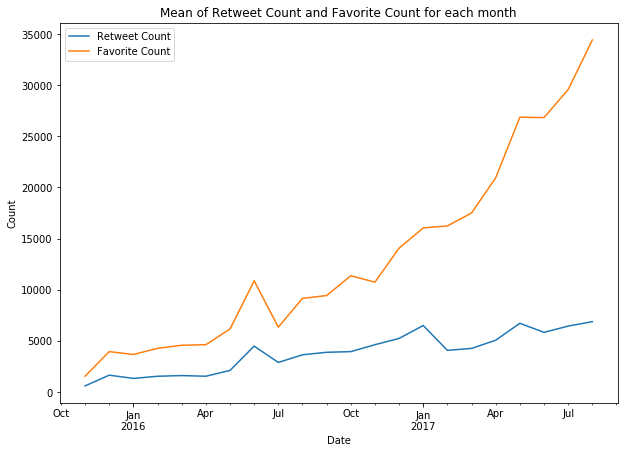

In [59]:
plt.figure(figsize=[10,7])
df.groupby(df['timestamp'].dt.to_period("M")).mean()['retweet_count'].plot(label='Retweet Count')
df.groupby(df['timestamp'].dt.to_period("M")).mean()['favorite_count'].plot(label='Favorite Count')
plt.title('Mean of Retweet Count and Favorite Count for each month')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')

>According to the plot, it same as the page become more popular over time.

**What are the most popular dog names?**

Text(0,0.5,'Dog name')

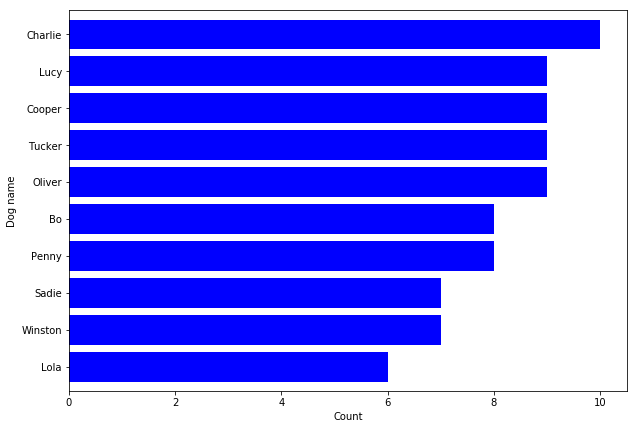

In [4]:
plt.figure(figsize=[10,7])
df.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.8,color='b')
plt.xlabel('Count')
plt.ylabel('Dog name')

>According to the plot Charlie is the most popular dog name followed by Cooper, Oliver, Lucy and Tucker.

**What is the most popular dog category?**

Text(0,0.5,'Dog Category')

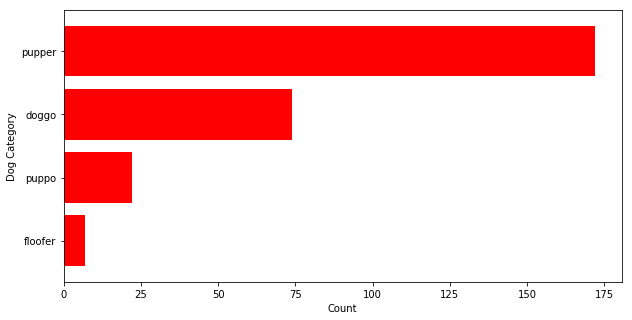

In [6]:
plt.figure(figsize=[10,5])
df.dog_category.value_counts().sort_values(ascending=True).plot.barh(width=0.8,color='r')
plt.xlabel('Count')
plt.ylabel('Dog Category')

>The most popular dog category is pupper followed by doggo then puppo and the last one is floofer.

**What is the most rated dog category**

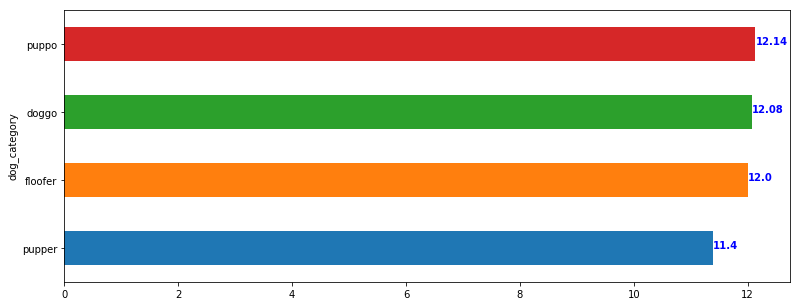

In [128]:
a = (df.groupby(df.dog_category).rating_numerator.sum()/df.groupby(df.dog_category).tweet_id.count()).sort_values()
plt.figure(figsize=[13,5])
a.plot(kind='barh')
for i, v in enumerate(a):
    plt.text(v, i , str(round(v, 2)), color='blue', fontweight='bold')

>The most rated dog category is puppo followed by doggo than floofer and the last one is pupper